In [9]:
def get_relevant_activations(data, markup_for_tag):
    result = []
    for i, tag in enumerate(markup_for_tag):
        if tag != 0:
            result.append(data[i])
    return np.stack(result)


def get_matches(activations, markup):
    markup = np.array(markup)
    markup_devs = markup - np.mean(markup)
    activation_devs = activations - np.mean(activations, 0, keepdims=True)
    activation_stddevs = np.std(activations, 0, ddof=1, keepdims=True)
    markup_stddev = np.std(markup, ddof=1)
    activation_dev_fractions = activation_devs / (activation_stddevs + 1e-20)
    markup_dev_fractions = markup_devs / (markup_stddev + 1e-20)
    return activation_dev_fractions * np.reshape(markup_dev_fractions, [-1, 1])


def compute_stats(data, markup_for_tag):
    markup_for_tag = np.array(markup_for_tag)
    stats = {}
    stats['markup'] = markup_for_tag
    stats['relevant_markup'] = list(filter(lambda x: x != 0, markup_for_tag))
    stats['relevant_activations'] = get_relevant_activations(data, markup_for_tag)
    stats['matches'] = get_matches(stats['relevant_activations'], stats['relevant_markup'])
    stats['correlations'] = np.mean(stats['matches'], 0)
    assert stats['correlations'].ndim == 1
    stats['match_stddevs'] = np.std(stats['matches'], 0)
    stats['mean_square_correlation'] = np.sqrt(np.mean(stats['correlations']**2))
    stats['meta'] = {
        "positive": np.count_nonzero(markup_for_tag == 1),
        "negative": np.count_nonzero(markup_for_tag == -1),
        "total": len(stats['markup']),
    }
    return stats

In [11]:
import os
import pickle
import numpy as np

os.makedirs('test', exist_ok=True)

with open("test/test.pickle", 'wb') as f:
    pickle.dump(np.array([[4]*10]*50), f)

In [12]:
! ls -l test

итого 8
-rw-rw-r-- 1 anton anton 4160 июн  7 11:29 test.pickle


In [5]:
import tensorflow as tf

def get_axis_quarters(tensor):
    last_dim = tf.shape(tensor, out_type=tf.float32)[-1]
    exponents = tf.range(0., last_dim, 1., dtype=tf.float32)
    powers = tf.math.pow(2., exponents)
    binary_format = tf.cast(tensor > 0, tf.float32)
    linear_combination = powers * binary_format
    numbers = tf.reduce_sum(linear_combination, axis=-1)
    return tf.cast(numbers, tf.int32)

tensor = tf.constant(
    [[1, -1, 1],
     [-1, -1, -1]]
)

axis_quarters = get_axis_quarters(tensor)

with tf.Session() as sess:
    print(sess.run(axis_quarters))

[5 0]


In [17]:
import pickle
import numpy as np


tmpl = '/media/anton/DATA/results/h-elmo/expres/resrnn/poscorr/4/9/corr/level1_1/NNS/{}.pickle'
file_name = tmpl.format('correlations')
with open(file_name, 'rb') as f:
    corr = pickle.load(f)
    
print(max(corr))
print(np.argmax(corr))

0.579867856049573
62


In [1]:
from collections import Counter
import numpy as np

a = np.array([1, 2, 3])

c = Counter(a)
print(c)

Counter({1: 1, 2: 1, 3: 1})


In [3]:
matches = tmpl.format('matches')
with open(matches, 'rb') as f:
    m = pickle.load(f)

m62 = m[:, 62]
print(m62)
print(max(m62))
print(np.argmax(m62))
print(min(m62))
print(np.argmin(m62))

[ 0.08246549  0.02131961  0.08308583 ... -0.55830922  0.02906624
  0.02100856]
18.750923953380248
50567
-13.644160917601068
52351


In [4]:
print(np.std(m62))

2.387342495802599


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

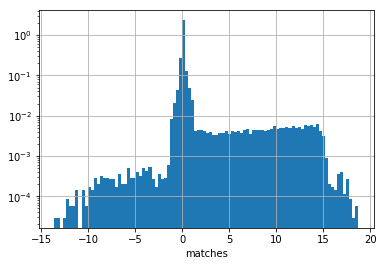

In [6]:
threshold = 0
f1 = m62[m62 > threshold]
f2 = m62[m62 <= -threshold]
filtered = np.concatenate([f1, f2])
plt.hist(filtered, bins=100, density=True)
plt.grid()
plt.yscale('log')
plt.xlabel('matches')

plt.show()

In [7]:
act = tmpl.format('relevant_activations')
with open(act, 'rb') as f:
    act = pickle.load(f)

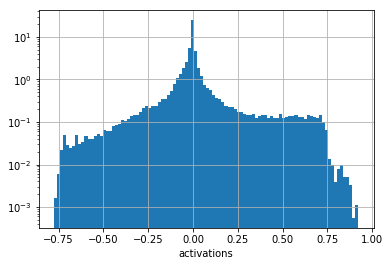

In [8]:
act62 = act[:, 62]
plt.hist(act62, bins=100, density=True)
plt.grid()
plt.yscale('log')
plt.xlabel('activations')

plt.show()

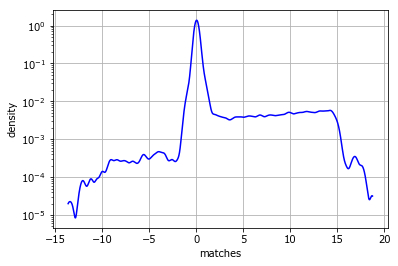

In [15]:
from helmo.util.plot.plot_helpers import density_plot

density_plot(m62, 0.001, None, 'blue')
plt.yscale('log')
plt.xlabel('matches')
plt.ylabel('density')
plt.grid()
plt.savefig(
    '/media/anton/DATA/results/h-elmo/expres/resrnn/poscorr/4/9/corr/level1_1/NNS/plots/matches.png',
    dpi=900
)
plt.show()

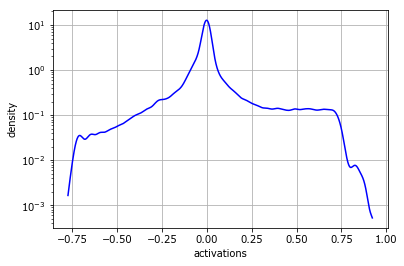

In [19]:
from helmo.util.plot.plot_helpers import density_plot

density_plot(act62, 0.0001, None, 'blue')
plt.yscale('log')
plt.xlabel('activations')
plt.ylabel('density')
plt.grid()
plt.savefig(
    '/media/anton/DATA/results/h-elmo/expres/resrnn/poscorr/4/9/corr/level1_1/NNS/plots/activations.png',
    dpi=900
)
plt.show()

In [171]:
! export PYTHONPATH="~/h-elmo:~/learning-to-learn"

In [173]:
! echo $PYTHONPATH

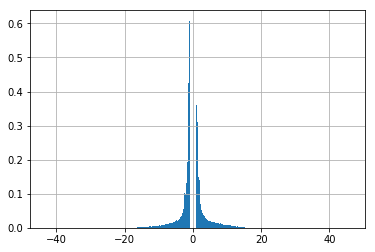

In [25]:
f1 = m[m > 1.]
f2 = m[m < -1.]
filtered = np.concatenate([f1, f2])
plt.hist(filtered, bins=1000, density=True)
plt.grid()
plt.show()

In [ ]:
tmpl = '/media/anton/DATA/results/h-elmo/expres/resrnn/poscorr/4/9/corr/level0_0/NNS/{}.pickle'
matches = tmpl.format('matches')
with open(matches, 'rb') as f:
    m = pickle.load(f)

In [ ]:
act = tmpl.format('activations')
with open(act, 'rb') as f:
    a = pickle.load(f)
    


In [ ]:
stddevs = tmpl.format('match_stddevs')
with open(stddevs, 'rb') as f:
    std = pickle.load(f)

print(std)
print(max(std))
print(np.argmax(std))

In [1]:
import tensorflow as tf


def get_all_values_except_specified(tensor, excluded):
    with tf.name_scope('get_all_values_except_specified'):
        tensor = tf.reshape(tensor, [-1])
        excluded = tf.reshape(excluded, [-1])
        excluded_shape = tf.shape(excluded)
        tensor_expanded = tf.reshape(tensor, [-1, 1])
        multiples = tf.concat([[1], excluded_shape], 0)
        tensor_expanded = tf.tile(tensor_expanded, multiples)
        masks = tf.cast(tf.equal(tf.cast(tensor_expanded, tf.int32), tf.cast(excluded, tf.int32)), tf.int32)
        mask = tf.reduce_sum(masks, [1])
        mask = tf.cast(tf.cast(mask, dtype=tf.bool), dtype=tf.int32) - 1
        return tf.boolean_mask(tensor, mask)
    

tensor, num_dims, axes, output = (
                    [[[1, 2], [3, 4]], [[5, 6], [7, 8]]],

                    5,

                    [0, 2, 4],

                    [[[[[1, 2]], [[3, 4]]], [[[5, 6]], [[7, 8]]]]],
                )

if not tf.contrib.framework.is_tensor(tensor):
    tensor = tf.constant(tensor)
if not tf.contrib.framework.is_tensor(axes):
    axes = tf.constant(axes, dtype=tf.int32)
sh = tf.shape(tensor, out_type=tf.int32)
nd = tf.shape(sh, out_type=tf.int32)[0]
assert_axes_smaller_than_num_dims = tf.assert_less(
    axes, num_dims, message='`axes` has to be less than `num_dims`')
check_num_dims = tf.assert_greater_equal(
    num_dims, nd,
    message='`num_dims` has to be greater or equal to number of dimensions in `tensor`'
)
ass_axes_bigger_or_equal_than_num_dims = tf.assert_greater_equal(axes, -num_dims)

negative_axes_mask = tf.cast(axes < 0, tf.int32)
axes += negative_axes_mask * num_dims

ones_for_expansion = tf.ones(tf.reshape(num_dims - nd, [1]), dtype=tf.int32)
shape_for_expansion = tf.concat([sh, ones_for_expansion], 0)

tensor = tf.reshape(tensor, shape_for_expansion)

# remained_axes = get_all_values_except_specified(tf.range(num_dims, dtype=tf.int32), axes)
# perm = tf.concat([axes, remained_axes], 0)
updates = tf.range(0, num_dims, 1, dtype=tf.int32)
remained_positions = get_all_values_except_specified(tf.range(num_dims, dtype=tf.int32), axes)
indices = tf.concat([axes, remained_positions], 0)
indices = tf.reshape(indices, [-1, 1])
perm_shape = tf.reshape(num_dims, [1])
perm = tf.scatter_nd(indices, updates, perm_shape)

with tf.control_dependencies([check_num_dims, assert_axes_smaller_than_num_dims, ass_axes_bigger_or_equal_than_num_dims]):
    tensor = tf.transpose(tensor, perm=perm)
    

with tf.Session() as sess:
    print(sess.run(tensor))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

[[[[[1 2]]

   [[3 4]]]]



 [[[[5 6]]

   [[7 8]]]]]


In [1]:
import numpy as np

from helmo.util.scripts.text_neuron_correlation import compute_stats

num_unrollings = 20
num_units = 4

# a = np.random.rand(num_units, num_unrollings)

m = np.random.choice([-1, 1, 0], num_unrollings)
a = np.stack([m]*num_units, 1)
print(a)

stats = compute_stats(a, m)
print(stats)

[[-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 0  0  0  0]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]
 [ 0  0  0  0]
 [ 1  1  1  1]
 [ 0  0  0  0]
 [ 1  1  1  1]]
{'markup': array([-1,  1,  0, -1,  1, -1,  1, -1,  0,  0, -1, -1, -1, -1,  0,  1,  0,
        1,  0,  1]), 'relevant_markup': [-1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1], 'relevant_activations': array([[-1, -1, -1, -1],
       [ 1,  1,  1,  1],
       [-1, -1, -1, -1],
       [ 1,  1,  1,  1],
       [-1, -1, -1, -1],
       [ 1,  1,  1,  1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [ 1,  1,  1,  1]]), 'matches': array([[0.75      , 0.75      , 0.75      , 0.75      ],
       [1.33333333, 1.33333333, 1.33333333, 1.33333333],
       [0.75      , 

In [161]:
import numpy as np


def get_int_part(n):
    return str(int(n // 1))


def get_frac_part(n):
    removed = int(get_int_part(n))
    frac_part = ''
    while n % 1:
        n *= 10
        removed *= 10
        frac_part += str(int(n // 1) - removed)
        removed = int(n // 1)
    return frac_part


def get_kth_digit(number, k, default='0'):
    """Returns k-th digit. For example, in number 123.45 1 
    is 2nd digit, 3 is zeroth and 5 is -2nd. 
    If the number does not have such a digit default is returned.
    Args:
        number: float or str convertable to float
        k: integer
    Returns:
        str"""
    if isinstance(number, str):
        number = float(number)
    int_part = get_int_part(number)
    frac_part = get_frac_part(number)
    number = int_part + frac_part
    k = len(int_part) - k - 1
    if 0 <= k < len(number):
        return number[k]
    else:
        return default
    
    
def get_first_nonzero_digit_pos(n):
    if n == 0:
        return None
    int_part = get_int_part(n)
    frac_part = get_frac_part(n)
    if int(int_part):
        return len(int_part) - 1
    i = 0
    while i < len(frac_part) and not int(frac_part[i]):
        i += 1
    assert frac_part[i] != '0'
    return -i - 1


def get_acc_num_digits(std, acc):
    if std == 0:
        return None
    
    std_err = std * acc
    
    nz_err = get_first_nonzero_digit_pos(std_err)
    
    digit_1_pos_higher = get_kth_digit(std, nz_err+1)
    
    higher_digit_change = get_kth_digit(std + std_err, nz_err+1) != digit_1_pos_higher or \
        get_kth_digit(std - std_err, nz_err+1) != digit_1_pos_higher

    if higher_digit_change:
        nz_err += 1
    return nz_err

for std in np.linspace(0, 1, 101):
    last_digit = get_acc_num_digits(std, 0.2)
    print(std, last_digit)

0.0 None
0.01 -2
0.02 -2
0.03 -2
0.04 -2
0.05 -2
0.06 -2
0.07 -2
0.08 -2
0.09 -1
0.1 -1
0.11 -1
0.12 -1
0.13 -2
0.14 -2
0.15 -2
0.16 -2
0.17 -1
0.18 -1
0.19 -1
0.2 -1
0.21 -1
0.22 -1
0.23 -1
0.24 -1
0.25 -1
0.26 -1
0.27 -1
0.28 -1
0.29 -1
0.3 -1
0.31 -1
0.32 -1
0.33 -1
0.34 -1
0.35000000000000003 -1
0.36 -1
0.37 -1
0.38 -1
0.39 -1
0.4 -1
0.41000000000000003 -1
0.42 -1
0.43 -1
0.44 -1
0.45 -1
0.46 -1
0.47000000000000003 -1
0.48 -1
0.49 -1
0.5 -1
0.51 -1
0.52 -1
0.53 -1
0.54 -1
0.55 -1
0.56 -1
0.5700000000000001 -1
0.58 -1
0.59 -1
0.6 -1
0.61 -1
0.62 -1
0.63 -1
0.64 -1
0.65 -1
0.66 -1
0.67 -1
0.68 -1
0.6900000000000001 -1
0.7000000000000001 -1
0.71 -1
0.72 -1
0.73 -1
0.74 -1
0.75 -1
0.76 -1
0.77 -1
0.78 -1
0.79 -1
0.8 -1
0.81 -1
0.8200000000000001 -1
0.8300000000000001 -1
0.84 0
0.85 0
0.86 0
0.87 0
0.88 0
0.89 0
0.9 0
0.91 0
0.92 0
0.93 0
0.9400000000000001 0
0.9500000000000001 0
0.96 0
0.97 0
0.98 0
0.99 0
1.0 0


In [138]:
get_kth_digit(123.45678, -4)

'7'

In [132]:
def get_first_nonzero_digit_pos_for_std(std, acc):
    if std == 0:
        return None
    std_fraction = std * acc
    int_part = get_int_part(std_fraction)
    frac_part = get_frac_part(std_fraction)
    if int(int_part):
        return len(int_part) - 1
    i = 0
    while i < len(frac_part) and not int(frac_part[i]):
        i += 1
    assert frac_part[i] != '0'
    return -i - 1


get_first_nonzero_digit_pos_for_std(0.0123456, 1000)

1

In [90]:
import sys
sys.float_info


sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [100]:
m = 1.23
print(m *10)
isinstance(m // 1, int)

12.3


False

In [116]:
def get_int_part(n):
    return str(int(n // 1))


def get_frac_part(n):
    removed = int(get_int_part(n))
    frac_part = ''
    while n % 1:
        n *= 10
        removed *= 10
        frac_part += str(int(n // 1) - removed)
        removed = int(n // 1)
    return frac_part

len(get_frac_part(2.2250738585072014e-308))

324

In [3]:
import queue
import Multiprocessing

def target_function(q, *args, **kwargs):
    print("in target function")
    res = func(*args, **kwargs)
    q.put(res)
    print("res is put in queue")

def wrapper(*args, **kwargs):
    print("in wrapper")
    q = queue.Queue()
    p = multiprocessing.Process(target=target_function, args=tuple([q]+list(args)), kwargs=kwargs)
    p.start()
    res = q.get()
    print("got result")
    p.join()
    print("joined")
    return res

def func():
    return 1

wrapper()

in wrapper


NameError: name 'queue' is not defined

In [13]:
import tensorflow as tf

print(tf.placeholder(tf.float32).__class__.__bases__)
print(tf.zeros([1]).__class__.__bases__)
print(tf.Variable(0).__class__.__bases__[0].__bases__[0].__bases__)

(<class 'tensorflow.python.framework.ops._TensorLike'>,)
(<class 'tensorflow.python.framework.ops._TensorLike'>,)
(<class 'tensorflow.python.training.checkpointable.base.CheckpointableBase'>,)


In [1]:
def partition(A, lo, hi):
    #print(lo, hi, A)
    if A[lo] > A[hi]:
        A[lo], A[hi] = A[hi], A[lo]
    pivot_1 = A[lo]
    pivot_2 = A[hi]
    i_1 = lo + 1
    i_2 = hi - 1
    for j in range(lo + 1, hi):
        # print(j, i_1, i_2, A)
        if A[j] < pivot_1:
            A[i_1], A[j] = A[j], A[i_1]
            i_1 += 1
        elif A[j] > pivot_2:
            while (A[i_2] > pivot_2) and (i_2 > j):
                i_2 -= 1
            A[i_2], A[j] = A[j], A[i_2]
            i_2 -= 1
            
            if A[j] < pivot_1:
                A[i_1], A[j] = A[j], A[i_1]
                i_1 += 1

        if j >= i_2:
            break
    i_1 -= 1
    i_2 += 1
    A[i_1], A[lo] = A[lo], A[i_1]
    A[i_2], A[hi] = A[hi], A[i_2]
    #print(i_1, i_2, A)
    return i_1, i_2

def DualPivotQuickSort(A, lo, hi):
    if lo < hi:
        p_1, p_2 = partition(A, lo, hi)
        DualPivotQuickSort(A, lo, p_1 - 1)
        DualPivotQuickSort(A, p_1 + 1, p_2 - 1)
        DualPivotQuickSort(A, p_2 + 1, hi)


In [5]:
import random



for _ in range(100000):
    A = [random.randint(0, 20) for _ in range(20)]
    a = A.copy()
    DualPivotQuickSort(a, 0, len(A) - 1)
    assert sorted(A) == a


In [6]:

def union(A, B):
    C = []
    i_1, i_2 = 0, 0
    for _ in range(len(A) + len(B)):
        
        if i_1 >= len(A):
            C += B[i_2:]
            break
        
        if i_2 >= len(B):
            C += A[i_1:]
            break
            
        if A[i_1] < B[i_2]:
            C.append(A[i_1])
            i_1 += 1
        elif A[i_1] > B[i_2]:
            C.append(B[i_2])
            i_2 += 1
        else:
            C.append(A[i_1])
            i_1 += 1
            i_2 += 1
            
    return C

In [75]:
"{:f}".format(1.1234567890123456789)

'1.123457'

In [12]:
def partition(A,lo,hi): 
    
   
    if lo < hi:
        if A[lo] > A[hi]:
            A[lo],A[hi] = A[hi], A[lo]
        lp = lo + 1
        rp = hi - 1 
        piv1 = A[lo]
        piv2 = A[hi]  
            
        for j in range(lo + 1, hi):
        # print(j, i_1, i_2, A)
            if A[j] < piv1:
                A[lp], A[j] = A[j], A[lp]
                lp += 1
            elif A[j] > piv2:
                while (A[rp] > piv2) and (rp > j):
                    rp -= 1
                A[rp], A[j] = A[j], A[rp]
                rp -= 1

            if A[j] < piv1:
                    A[lp], A[j] = A[j], A[lp]
                    lp += 1

            if j >= rp:
                break
        lp -= 1
        rp += 1
        A[lp], A[lo] = A[lo], A[lp]
        A[rp], A[hi] = A[hi], A[rp]
        #print(i_1, i_2, A)
        return lp, rp

            
def DualPivotQuickSort(A, lo, hi):
   # def partition(arr, low, high, lp):
        
    if lo < hi: 
        #// lp means left pivot, and rp means right pivot. 
        #lp, rp  
        p1,p2 = partition(A, lo, hi)
        DualPivotQuickSort(A, lo, p1 - 1)
        DualPivotQuickSort(A, p1 + 1, p2 - 1)
        DualPivotQuickSort(A, p2 + 1, hi)
   # return a

num_tests = 1000
for _ in range(num_tests):
    try:
        a = [random.randint(0, 100) for _ in range(10)]
        a1 = a.copy()
        DualPivotQuickSort(a, 0, len(a)-1)
        if a != sorted(a1):
            print(a1)
    except IndexError:
        print(a1)
        break

[83, 51, 94, 75, 23, 32, 25, 44, 89, 90]


In [1]:
import multiprocessing as mp

mp.set_start_method('spawn')

def print_obj_id(my_obj):
    print(id(my_obj)) 
    
list_ = [1, 2, 3, 4, 5, 6, 7]
print(id(list_))
p = mp.Process(target=print_obj_id, args=(list_,))
p.start()
p.join()

139668166738248
